# Day 2 - Supervised learning tutorial

***
Welcome to the tutorial on supervised learning. This guide will walk you through some fundamental concepts and essential steps for linear regression, logistic regression, decision trees, model evaluation and regularization.
***

**_NOTE_**: This notebook has been tested in the following environment:

* Python version = 3.14.2

## Overview

***

### Table of Contents
- [Overview](#Overview)
- [Before you begin](#Before-you-begin)
- [Linear regression](#Linear-regression)
- [Logistic regression](#Logistic-regression)
- [Decision trees](#Decision-trees)
- [Regularization](#Regularization)

### Objective

In this tutorial, you will learn how to create and evaluate different supervised machine learning models and their predictions for continuous and categorical data.

### Datasets

Datasets for linear and logistic regression examples are randomly generated.

We will use Iris dataset for classification task with decision trees. Each row of the table represents an iris flower, including its species and dimensions of its botanical parts, sepal and petal, in centimeters.

### Useful resources

- [LinearRegression from sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [Video - Linear Regression with Gradient Descent](https://www.youtube.com/watch?v=L-Lsfu4ab74)
- [LogisticRegression from sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

## Before you begin
[Return to Table of Contents](#Table-of-Contents)  
***

### Setup

The guide is structured in the following way:  

- Create/read the data
- Split data for modelling
- Plot data
- Model and prediction
- Evaluation

### Import libraries

In [1]:
import numpy as np
import pandas as pd

# Data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Linear regression
[Return to Table of Contents](#Table-of-Contents)  
***

Linear Regression is one of the most common and fundamental techniques for solving problems involving continuous target variables. Linear Regression is a simple yet powerful method that models the relationship between one or more independent variables and a continuous dependent variable by fitting a straight line to the data.

Linear Regression can be applied to various real-world problems, such as predicting house prices based on features like size and location, forecasting sales revenue for a business, estimating the impact of advertising spend on product sales, predicting a student's performance based on study hours, and many more scenarios where the target variable is continuous.

In [2]:
# Generate random data for modelling
np.random.seed(123)
number_of_instances = 100
predictor = np.arange(number_of_instances)
epsilon = np.random.uniform(-10,10, size=(number_of_instances,))
target = .4 * predictor + 3 + epsilon

In [3]:
# In order to use these arrays for regression modelling they need to be reshaped to 2D arrays
X = predictor.reshape(number_of_instances, 1)
y = target.reshape(number_of_instances, 1)

#### Splitting data in test and training set
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [4]:
# split data in training and test set
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(80, 1) (80, 1) (20, 1) (20, 1)


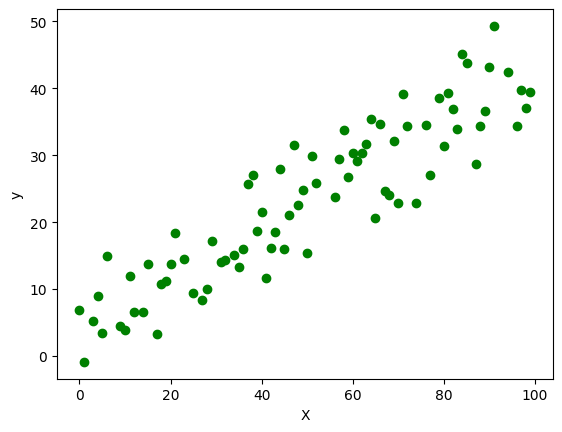

In [5]:
# plot data 
plt.scatter(X_train, y_train,  color='green')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

#### Model and prediction
Create a Linear Regression object using LinearRegression() function.

The linear regression model takes the form: y = β0 + β1*x + ε, where Beta are the regression coefficients we want to find and epsilon is the error that we want to minimise.

In [6]:
# Create object that stands for Linear regression
model = LinearRegression(fit_intercept=True)
# Fit linear regression model
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [7]:
print(model.intercept_) # b0
print(model.coef_) # b1

[4.03219882]
[[0.38582515]]


In [8]:
# Generate predictions
y_pred = model.predict(X_test)

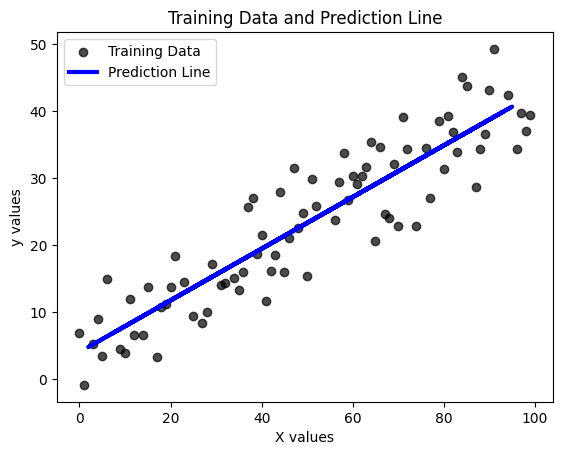

In [9]:
# Scatter plot for training data
plt.scatter(X_train, y_train, color='black', label='Training Data', alpha=0.7)

# Line plot for predictions
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Prediction Line')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Training Data and Prediction Line')

# Add a legend
plt.legend()

# Add ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

The blue line shows how well the model fits the data.
The line closely follows the trend of the black points, indicating that the model has learned the relationship between `X` and `y` well.

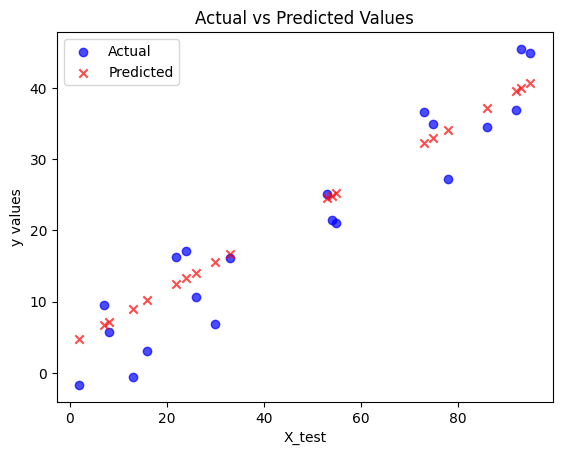

In [10]:
# Scatter plot for actual values
plt.scatter(X_test, y_test, color='blue', label='Actual', marker='o', alpha=0.7)

# Scatter plot for predicted values
plt.scatter(X_test, y_pred, color='red', label='Predicted', marker='x', alpha=0.7)

# Add labels and title
plt.xlabel('X_test')
plt.ylabel('y values')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

This plot shows predictions against the real values. Red points closer to blue points indicate more accurate predictions.

In [11]:
# You can check the differences between results
np.concatenate((y_pred, y_test), axis = 1)

array([[14.06365276, 10.63577311],
       [37.21316185, 34.54795133],
       [ 4.80384913, -1.66297093],
       [25.25258216, 21.08241578],
       [32.96908519, 34.88863759],
       [39.91393791, 45.45095628],
       [10.20540125,  3.04983461],
       [32.19743488, 36.66832716],
       [24.866757  , 21.45527668],
       [40.68558822, 44.83403597],
       [24.48093185, 25.10136013],
       [39.52811276, 36.91829731],
       [34.12656064, 27.2614103 ],
       [ 9.04792579, -0.60644207],
       [ 6.73297488,  9.49659477],
       [15.60695337,  6.8420988 ],
       [12.52035216, 16.2891065 ],
       [13.29200246, 17.04886765],
       [16.76442882, 16.07370195],
       [ 7.11880004,  5.81863803]])

### Model evaluation

Regression metrics are quantitative measures used to evaluate the nice of a regression model. Scikit-analyze provides several metrics, each with its own strengths and boundaries, to assess how well a model suits the statistics.

In [12]:
# Calculate MAE, MSE, R^2 and RMSE
print("MAE score:", mean_absolute_error(y_test, y_pred))
print("MSE score:", mean_squared_error(y_test, y_pred))
print("RMSE score:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 score:", r2_score(y_test, y_pred))

MAE score: 4.208388957968042
MSE score: 23.746217706269338
RMSE score: 4.873009101804484
R^2 score: 0.8849783142306378


- **MAE:** on average, model's predictions are off by about 4.21 units from the actual values.
- **MSE:** the average squared error is 23.75, meaning larger errors are penalized more heavily.
- **RMSE:** the typical error in your predictions is about 4.87 units, in the same scale as your data.
- **$R^2$:** model explains 88% of the variation in the data, which is a strong fit.

### Batch gradient descent alghoritm

Gradient descent is an optimization algorithm used to minimize a function (often a loss function in machine learning) by iteratively adjusting parameters in the direction of the steepest descent, as determined by the negative gradient.

In [13]:
# Let's find the b0 and b1 for  y = b0 * x + b1  that would fit out data
# And let's do that by using the gradient descent algorithm
# which is pretty much the same as doing linear regression manually
# we will start with y = 0 * x + 0 and go from there
b0 = 0
b1 = 0 

# L is the learning rate
# it affects how much b0 and b1 will change after each iteration
L = 0.0001
# maximum amount of iterations
iteration = 100000
n = float(len(X_train))

for i in range(iteration):
    y_pred2 = b1 * X_train + b0
    # derivatives
    D_b0 = -(2/n) * sum(y_train - y_pred2)
    D_b1 = -(2/n) * sum(X_train * (y_train - y_pred2))
    b0 = b0 - L * D_b0
    b1 = b1 - L * D_b1
    # make a progress update every once in a while
    if i == 0 or (i+1) % (iteration/5) == 0: 
        print(f'Iteration: {i+1}')
        print(f'y = {b1[0]:.3f} * x + {b0[0]:.3f}  : {D_b0[0]:.3f}, {D_b1[0]:.3f}')
print(f'\nFinal Result:')
print(f'Iteration: {i+1}')
print(f'y = {b1[0]:.3f} * x + {b0[0]:.3f}')

Iteration: 1
y = 0.296 * x + 0.005  : -46.792, -2958.518
Iteration: 20000
y = 0.409 * x + 2.484  : -0.740, 0.011
Iteration: 40000
y = 0.395 * x + 3.437  : -0.285, 0.004
Iteration: 60000
y = 0.389 * x + 3.803  : -0.109, 0.002
Iteration: 80000
y = 0.387 * x + 3.944  : -0.042, 0.001
Iteration: 100000
y = 0.386 * x + 3.998  : -0.016, 0.000

Final Result:
Iteration: 100000
y = 0.386 * x + 3.998


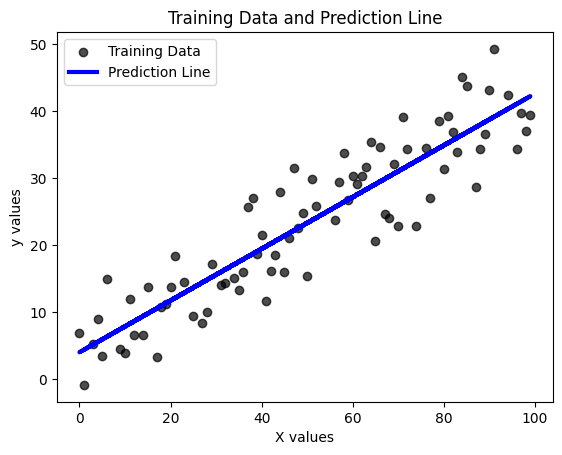

In [14]:
y_pred2 = b0 + b1 * X_train

# Scatter plot for training data
plt.scatter(X_train, y_train, color='black', label='Training Data', alpha=0.7)

# Line plot for predictions
plt.plot(X_train, y_pred2, color='blue', linewidth=3, label='Prediction Line')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Training Data and Prediction Line')

# Add a legend
plt.legend()

# Add ticks for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()

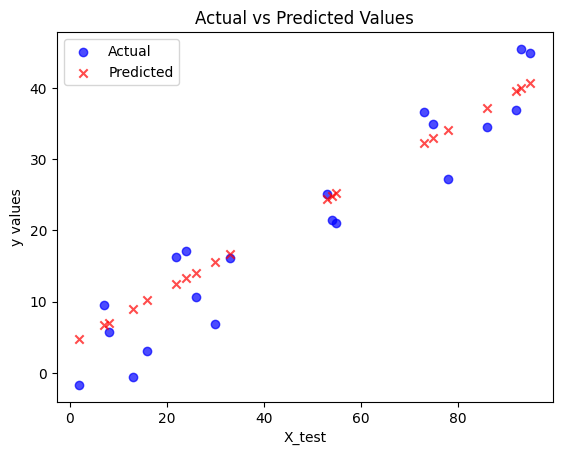

In [15]:
y_pred_test = b0 + b1 * X_test

# Scatter plot for actual values
plt.scatter(X_test, y_test, color='blue', label='Actual', marker='o', alpha=0.7)

# Scatter plot for predicted values
plt.scatter(X_test, y_pred_test, color='red', label='Predicted', marker='x', alpha=0.7)

# Add labels and title
plt.xlabel('X_test')
plt.ylabel('y values')
plt.title('Actual vs Predicted Values')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [16]:
# You can check the differences between results
np.concatenate((y_pred_test, y_pred, y_test), axis = 1)

array([[14.04313128, 14.06365276, 10.63577311],
       [37.22347022, 37.21316185, 34.54795133],
       [ 4.7709957 ,  4.80384913, -1.66297093],
       [25.24696177, 25.25258216, 21.08241578],
       [32.97374142, 32.96908519, 34.88863759],
       [39.9278431 , 39.91393791, 45.45095628],
       [10.17974145, 10.20540125,  3.04983461],
       [32.20106345, 32.19743488, 36.66832716],
       [24.86062279, 24.866757  , 21.45527668],
       [40.70052107, 40.68558822, 44.83403597],
       [24.4742838 , 24.48093185, 25.10136013],
       [39.54150412, 39.52811276, 36.91829731],
       [34.13275836, 34.12656064, 27.2614103 ],
       [ 9.02072451,  9.04792579, -0.60644207],
       [ 6.70269061,  6.73297488,  9.49659477],
       [15.58848721, 15.60695337,  6.8420988 ],
       [12.49777535, 12.52035216, 16.2891065 ],
       [13.27045331, 13.29200246, 17.04886765],
       [16.74750415, 16.76442882, 16.07370195],
       [ 7.08902959,  7.11880004,  5.81863803]])

### Model evaluation

In [17]:
# Calculate MAE, MSE, R^2 and RMSE
print("MAE score:", mean_absolute_error(y_test, y_pred_test))
print("MSE score:", mean_squared_error(y_test, y_pred_test))
print("RMSE score:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R^2 score:", r2_score(y_test, y_pred_test))

MAE score: 4.202923008907416
MSE score: 23.667486613786874
RMSE score: 4.8649241118219795
R^2 score: 0.8853596710888884


#### Advantages
Linear regression is simple to understand and easy to implement, making it a great starting point for beginners in machine learning. It is computationally efficient and works well when there is a linear relationship between the input features and the target variable. Linear regression provides interpretable results, as the coefficients show the impact of each feature on the target variable. It also performs well with small datasets and doesn't require extensive tuning.

#### Disadvantages
Linear regression assumes a linear relationship between features and the target variable, so it struggles with non-linear data unless transformations are applied. It is sensitive to outliers, which can significantly affect the model's performance. Linear regression assumes that the features are independent of each other, so multicollinearity (high correlation between features) can reduce its effectiveness. Additionally, it may underperform when the dataset has a large number of irrelevant or noisy features.

## Logistic regression
[Return to Table of Contents](#Table-of-Contents)  
***

There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem. Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable. 

Logistic Regression can be used for various classification problems such as spam detection, diabetes prediction, if a given customer will purchase a particular product or will they churn another competitor, whether the user will click on a given advertisement link or not, and many more examples are in the bucket.

In [18]:
# Generate random data for modelling
n_samples = 1000
np.random.seed(0)
X = np.random.normal(size = n_samples)
y = (X > 0).astype(np.float64)
X[X > 0] = X[X > 0] * 4
X = X + 0.3 * np.random.normal(size = n_samples)
X = X[:, np.newaxis]

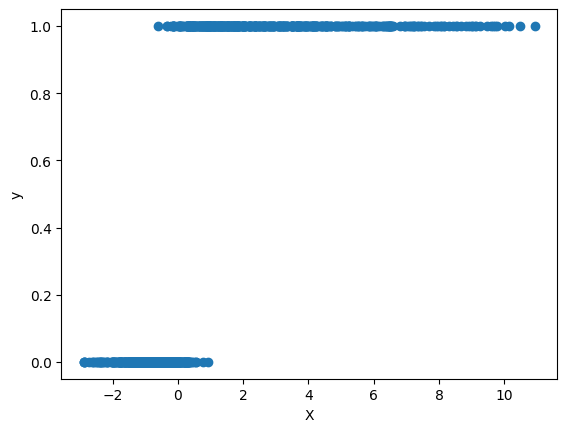

In [19]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Splitting data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [20]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((750, 1), (250, 1), (750,), (250,))

### Model and prediction
Create a Logistic Regression classifier object using LogisticRegression() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [21]:
# Run the Logistic Regression classifier
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [22]:
y_pred_log = logreg.predict(X_test)
y_pred_log[:10]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 1.])

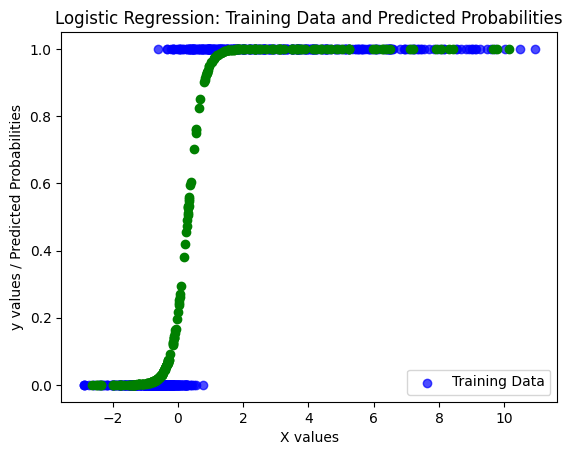

In [23]:
# Scatter plot for training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.7)

# Scatter plot for predicted probabilities
plt.scatter(X_test, logreg.predict_proba(X_test)[:,1], color = 'green')

# Add labels and title
plt.xlabel('X values')
plt.ylabel('y values / Predicted Probabilities')
plt.title('Logistic Regression: Training Data and Predicted Probabilities')

# Add a legend
plt.legend()

# Show the plot
plt.show()

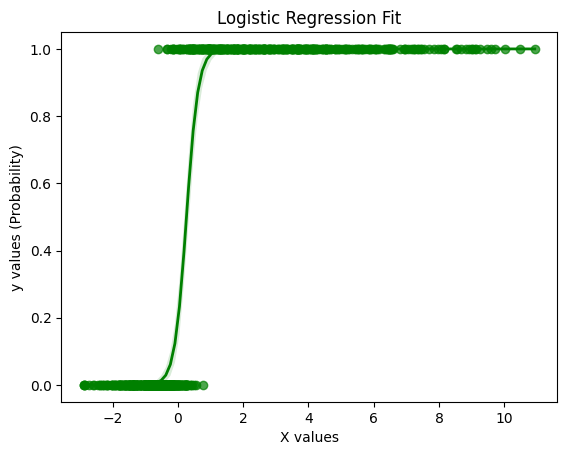

In [24]:
# Logistic regression plot
sns.regplot(x=X_train, y=y_train, logistic=True, color='green', scatter_kws={'alpha': 0.7}, line_kws={'linewidth': 2})

# Add labels and title
plt.xlabel('X values')
plt.ylabel('y values (Probability)')
plt.title('Logistic Regression Fit')

plt.show()

The scatter points show the actual data distribution, while the logistic regression curve shows the model's predicted probabilities.

If the curve transitions smoothly from 0 to 1 in the region where the points switch from `y=0` to `y=1` then the fit is good. 

In [25]:
# Examine some example predictions
print("probabilities = ", logreg.predict_proba([[1]]), "X value = ", X_test[1], "predicted = ", y_test[1], "true class = ", y_pred_log[1])
print("probabilities = ", logreg.predict_proba([[2]]), "X value = ", X_test[2], "predicted = ", y_test[2], "true class = ", y_pred_log[2])
print("probabilities = ", logreg.predict_proba([[3]]), "X value = ", X_test[3], "predicted = ", y_test[3], "true class = ", y_pred_log[3])

probabilities =  [[0.04460979 0.95539021]] X value =  [0.06921968] predicted =  1.0 true class =  0.0
probabilities =  [[5.97957399e-04 9.99402043e-01]] X value =  [-0.35167389] predicted =  0.0 true class =  0.0
probabilities =  [[7.66667943e-06 9.99992333e-01]] X value =  [-0.09112727] predicted =  0.0 true class =  0.0


### Model evaluation
A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [26]:
# Import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_log)
cnf_matrix

array([[122,   8],
       [  8, 112]])

#### Visualizing Confusion Matrix using Heatmap
Let's visualize the results of the model in the form of a confusion matrix using matplotlib and seaborn.

Here, you will visualize the confusion matrix using Heatmap.

Text(0.5, 427.9555555555555, 'Predicted label')

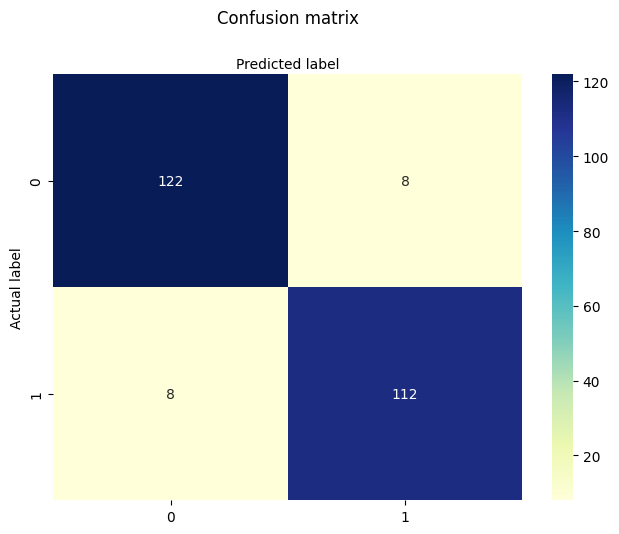

In [27]:
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions.

#### Advantages
Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

#### Disadvantages
Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

## Decision trees
[Return to Table of Contents](#Table-of-Contents)  
***

Decision Trees are one of the most intuitive and versatile techniques. A Decision Tree works by splitting the data into branches based on feature values, creating a tree-like structure that leads to a decision or prediction at each leaf node. It can handle both categorical and continuous target variables, making it suitable for a wide range of tasks.

Decision Trees can be applied to various real-world problems, such as predicting customer churn based on behavior patterns, classifying whether an email is spam or not, determining loan approval based on applicant details, diagnosing diseases based on symptoms, and many more scenarios where interpretability and flexibility are important.

In [28]:
# Loading the dataset
data = load_iris()
X = data.data  
y = data.target 

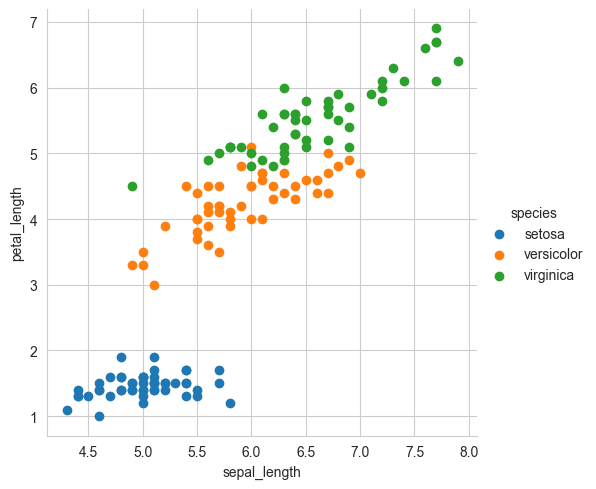

In [29]:
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species", 
              height = 5).map(plt.scatter, 
                              'sepal_length', 
                              'petal_length').add_legend()

#### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state to select records randomly.

In [30]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (150, 4)
Shape of y: (150,)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state = 99)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

#### Model and prediction
Create a Decision Tree classifier object using DecisionTreeClassifier() function.

Then, fit your model on the train set using fit() and perform prediction on the test set using predict().

In [32]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [33]:
y_pred_clf = clf.predict(X_test)
y_pred_clf[:10]


array([2, 0, 1, 2, 0, 1, 1, 2, 0, 2])

In [34]:
len(y_train)

105

In [35]:
from sklearn import tree
text_representation = tree.export_text(clf, feature_names=data.feature_names,
          class_names=data.target_names)
print(text_representation)

|--- petal width (cm) <= 0.75
|   |--- class: setosa
|--- petal width (cm) >  0.75
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: virginica
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: versicolor
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: virginica
|   |--- petal width (cm) >  1.75
|   |   |--- class: virginica



The `plot_tree` graph for a decision tree provides a visual representation of the tree structure used by the model to make decisions.

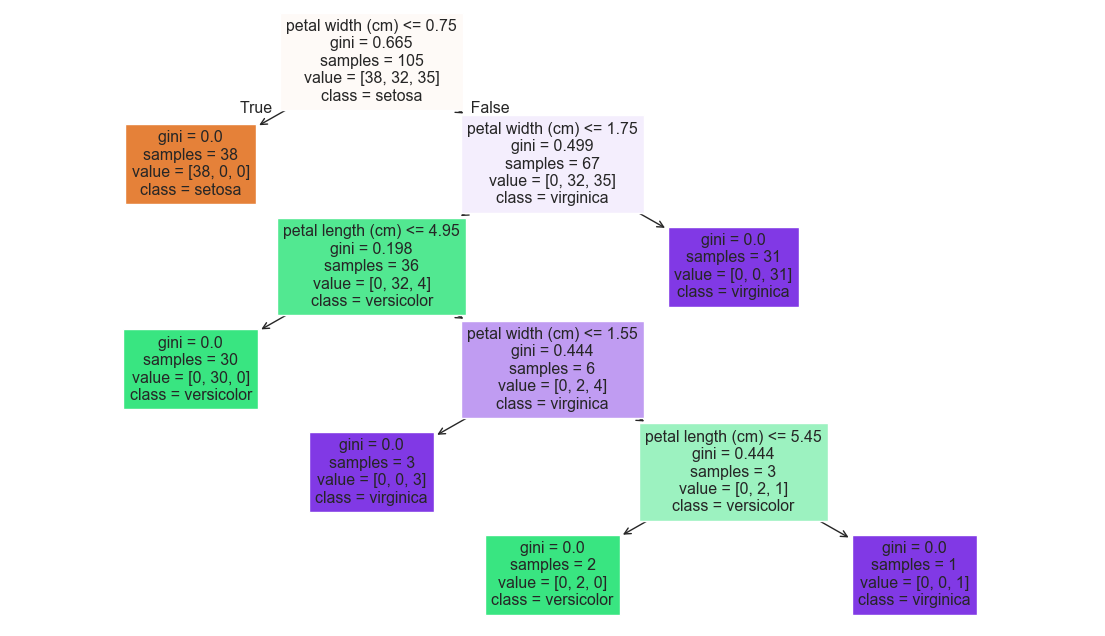

In [36]:
fig = plt.figure(figsize=(14,8))
_ = tree.plot_tree(clf, filled=True, feature_names=data.feature_names,
          class_names=data.target_names)

### Model evaluation

In [37]:
accuracy = accuracy_score(y_test, y_pred_clf)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9555555555555556


In [38]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_clf)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[12  0  0]
 [ 0 17  1]
 [ 0  1 14]]


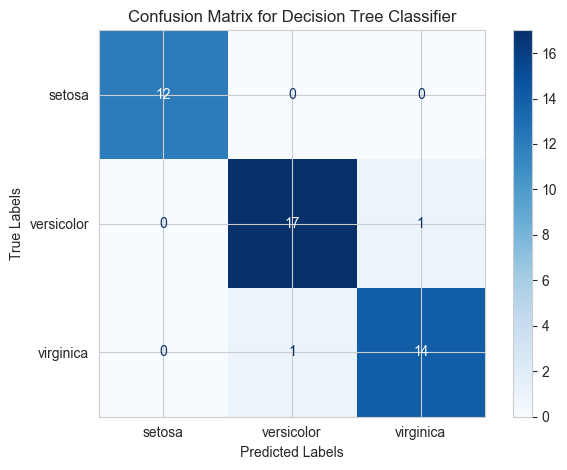

In [39]:
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix for Decision Tree Classifier")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
disp.figure_.tight_layout()

- **Setosa:** Perfect classification with no errors.
- **Versicolor:** One sample was misclassified as Virginica.
- **Virginica:** One sample was misclassified as Versicolor.

Overall, the model is performing well with hight accuracy (95.6%), with only 2 misclassifications out of 45 total samples.

#### Advantages
Decision trees are easy to understand and interpret, as they mimic human decision-making processes. They can handle both numerical and categorical data and do not require feature scaling or normalization. Decision trees are versatile and can model complex relationships, including non-linear patterns.

#### Disadvantages
Decision trees are prone to overfitting, especially when they grow too deep or have many branches. They can be sensitive to small changes in the data, which may lead to entirely different tree structures. Decision trees may struggle with imbalanced datasets and can be biased toward features with more levels.

## Regularization
[Return to Table of Contents](#Table-of-Contents) 
***

Regularization is a technique used in machine learning to prevent overfitting, which otherwise causes models to perform poorly on unseen data. By adding a penalty for complexity, regularization encourages simpler and more generalizable models.

There are mainly 3 types of regularization techniques, each applying penalties in different ways to control model complexity and improve generalization.
- **Lasso Regression:** a regression model which uses the L1 Regularization technique.
- **Ridge Regression:** a regression model that uses the L2 regularization technique.
- **Elastic Net Regression:** a combination of both L1 as well as L2 regularization.

In [40]:
# Generate a regression dataset with 100 samples, 5 features and some noise.
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Lasso regression

Adds the absolute value of magnitude of the coefficient as a penalty term to the loss function(L). This penalty can shrink some coefficients to zero which helps in selecting only the important features and ignoring the less important ones.

In [41]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("Coefficients:", lasso.coef_)

Mean Squared Error: 0.06362439921332522
Coefficients: [60.50305581 98.52475354 64.3929265  56.96061238 35.52928502]


The output shows the MSE showing model performance. Lower MSE means better accuracy. The coefficients reflect the regularized feature weights.

### Ridge regression

Adds the squared magnitude of the coefficient as a penalty term to the loss function(L). It handles multicollinearity by shrinking the coefficients of correlated features instead of eliminating them.

In [42]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", ridge.coef_)

Mean Squared Error: 4.114050771972589
Coefficients: [59.87954432 97.15091098 63.24364738 56.31999433 35.34591136]


### Elastic net regression

Shows that we add the absolute norm of the weights as well as the squared measure of the weights. With the help of an extra hyperparameter that controls the ratio of the L1 and L2 regularization.

In [43]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)

Mean Squared Error: 2662.329268376171
Coefficients: [41.2685658  60.6166494  34.45391474 37.4873701  26.29561474]
